In [26]:
import pandas as pd
import yaml
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

try:
  with open("../config.yaml", "r") as file:
     config = yaml.safe_load(file)
except:
  print("Configuration file not found!")




In [20]:
config

{'input_data': {'marathon_data': '../data/raw/Berlin_Marathon_data_1974_2019.csv',
  'marathon_winners': '../data/raw/berlin_marathon_winners_1974_2024.csv'},
 'output_data': {'cleaned_data': '../data/clean/cleaned_marathon.csv',
  'cleaned_winners': '../data/clean/cleaned_marathon_winners.csv'}}

In [21]:
df = pd.read_csv(config['input_data']['marathon_data'])

df

/tmp/ipykernel_28604/2106255920.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(config['input_data']['marathon_data'])


,YEAR,COUNTRY,GENDER,AGE,TIME
0,1974,NaN,male,L1,02:44:53
1,1974,NaN,male,L2,02:46:43
2,1974,NaN,male,L2,02:48:08
3,1974,NaN,male,L,02:48:40
4,1974,NaN,male,L1,02:49:01
...,...,...,...,...,...
884939,2019,GER,male,65.0,07:12:17
884940,2019,GER,male,75.0,07:12:30
884941,2019,GER,male,80.0,07:15:28
884942,2019,USA,male,30.0,07:19:28


In [22]:
import pandas as pd
from io import StringIO

data = """
Ed.	Date	Men's winner	Country	Time[b]	Women's winner	Country	Time[b]
50	29 September 2024	Milkesa Mengesha	Ethiopia	2:03:17	Tigist Ketema	Ethiopia	2:16:42
49	24 September 2023	Eliud Kipchoge	Kenya	2:02:42	Tigst Assefa	Ethiopia	2:11:53
48	25 September 2022	Eliud Kipchoge	Kenya	2:01:09	Tigst Assefa	Ethiopia	2:15:37
47	26 September 2021	Guye Adola	Ethiopia	2:05:45	Gotytom Gebreslase	Ethiopia	2:20:09
46	29 September 2019	Kenenisa Bekele	Ethiopia	2:01:41	Ashete Bekere	Ethiopia	2:20:14
45	16 September 2018	Eliud Kipchoge	Kenya	2:01:39	Gladys Cherono	Kenya	2:18:11
44	24 September 2017	Eliud Kipchoge	Kenya	2:03:32	Gladys Cherono	Kenya	2:20:23
43	25 September 2016	Kenenisa Bekele	Ethiopia	2:03:03	Aberu Kebede	Ethiopia	2:20:45
42	27 September 2015	Eliud Kipchoge	Kenya	2:04:00	Gladys Cherono	Kenya	2:19:25
41	28 September 2014	Dennis Kimetto	Kenya	2:02:57	Tirfi Tsegaye	Ethiopia	2:20:18
40	29 September 2013	Wilson Kipsang	Kenya	2:03:23	Florence Kiplagat	Kenya	2:21:13
39	30 September 2012	Geoffrey Mutai	Kenya	2:04:15	Aberu Kebede	Ethiopia	2:20:30
38	25 September 2011	Patrick Musyoki	Kenya	2:03:38	Florence Kiplagat	Kenya	2:19:44
37	26 September 2010	Patrick Musyoki	Kenya	2:05:08	Aberu Kebede	Ethiopia	2:23:58
36	20 September 2009	Haile Gebrselassie	Ethiopia	2:06:08	Atsede Habtamu	Ethiopia	2:24:47
35	28 September 2008	Haile Gebrselassie	Ethiopia	2:03:59	Irina Mikitenko	Germany	2:19:19
34	30 September 2007	Haile Gebrselassie	Ethiopia	2:04:26	Gete Wami	Ethiopia	2:23:17
33	24 September 2006	Haile Gebrselassie	Ethiopia	2:05:56	Gete Wami	Ethiopia	2:21:34
32	25 September 2005	Philip Manyim	Kenya	2:07:41	Mizuki Noguchi	Japan	2:19:12
31	26 September 2004	Felix Limo	Kenya	2:06:44	Yoko Shibui	Japan	2:19:41
30	28 September 2003	Paul Tergat	Kenya	2:04:55	Yasuko Hashimoto	Japan	2:26:32
29	29 September 2002	Raymond Kipkoech	Kenya	2:06:47	Naoko Takahashi	Japan	2:21:49
28	30 September 2001	Joseph Ngolepus	Kenya	2:08:47	Naoko Takahashi	Japan	2:19:46
27	10 September 2000	Simon Biwott	Kenya	2:07:42	Kazumi Matsuo	Japan	2:26:15
26	26 September 1999	Josephat Kiprono	Kenya	2:06:44	Tegla Loroupe	Kenya	2:20:43
25	20 September 1998	Ronaldo da Costa	Brazil	2:06:05	Marleen Renders	Belgium	2:25:22
24	28 September 1997	Elijah Lagat	Kenya	2:07:41	Catherina McKiernan	Ireland	2:23:44
23	29 September 1996	Abel Antón	Spain	2:09:15	Colleen De Reuck	South Africa	2:26:35
22	24 September 1995	Sammy Lelei	Kenya	2:07:02	Uta Pippig	Germany	2:25:37
21	25 September 1994	António Pinto	Portugal	2:08:31	Katrin Dörre-Heinig	Germany	2:25:15
20	26 September 1993	Xolile Yawa	South Africa	2:10:57	Renata Kokowska	Poland	2:26:20
19	27 September 1992	David Tsebe	South Africa	2:08:07	Uta Pippig	Germany	2:30:22
18	29 September 1991	Steve Brace	United Kingdom	2:10:57	Renata Kokowska	Poland	2:27:36
17	30 September 1990	Steve Moneghetti	Australia	2:08:16	Uta Pippig	East Germany	2:28:37
16	1 October 1989	Alfredo Shahanga	Tanzania	2:10:11	Päivi Tikkanen	Finland	2:28:45
15	9 October 1988	Suleiman Nyambui	Tanzania	2:11:45	Renata Kokowska	Poland	2:29:16
14	4 October 1987	Suleiman Nyambui	Tanzania	2:11:11	Kerstin Preßler	West Germany	2:31:22
13	28 September 1986	Bogusław Psujek	Poland	2:11:03	Charlotte Teske	West Germany	2:32:10
12	29 September 1985	Jimmy Ashworth	United Kingdom	2:11:43	Magda Ilands	Belgium	2:34:10
11	30 September 1984	John Skovbjerg	Denmark	2:13:35	Ágnes Sipka	Hungary	2:39:32
10	25 September 1983	Karel Lismont	Belgium	2:13:37	Karen Holdsworth	United Kingdom	2:40:32
9	26 September 1982	Domingo Tibaduiza	Colombia	2:14:47	Jean Lochhead	United Kingdom	2:47:05
8	27 September 1981	Ian Ray	United Kingdom	2:15:42	Angelika Stephan	West Germany	2:47:24
7	28 September 1980	Ingo Sensburg	West Germany	2:16:48	Gerlinde Püttmann	West Germany	2:47:18
6	30 September 1979	Ingo Sensburg	West Germany	2:21:09	Jutta von Haase	West Germany	3:07:07
5	3 September 1978	Michael Spöttel	West Germany	2:20:03	Ursula Blaschke	West Germany	2:57:09
4	10 September 1977	Günter Mielke	West Germany	2:15:19	Christa Vahlensieck	West Germany	2:34:48
3	26 September 1976	Ingo Sensburg	West Germany	2:23:08	Jutta von Haase	West Germany	3:05:19
2	28 September 1975	Ralf Bochröder	West Germany	2:47:08	Kristin Bochröder	West Germany	2:59:15
1	13 October 1974	Günter Hallas	West Germany	2:44:53	Jutta von Haase	West Germany	3:22:01
"""

df_winners = pd.read_csv(StringIO(data), sep="\t")

# Clean and rename

df_winners = df_winners.rename(columns={
    "Men's winner":"MEN_WINNER",
    "Country":"MEN_COUNTRY",
    "Time[b]":"MEN_TIME",
    "Women's winner":"WOMEN_WINNER",
    "Country.1":"WOMEN_COUNTRY",
    "Time[b].1":"WOMEN_TIME"
})

# Get only the year
df_winners["YEAR"] = df_winners["Date"].str.extract(r'(\d{4})').astype(int)

# Select columns
df_final = df_winners[[
    "YEAR","MEN_WINNER","MEN_COUNTRY","MEN_TIME","WOMEN_WINNER","WOMEN_COUNTRY","WOMEN_TIME"
]].sort_values("YEAR")


# Save new dataframe

df_final.to_csv("berlin_marathon_winners_1974_2024.csv", index=False)

print(df_final.head())
print(df_final.tail())


In [23]:
records = [
    # Men
    {"Year":1984,"Gender":"Men","City":"Chicago","Winner":"Steve Jones"},
    {"Year":1999,"Gender":"Men","City":"Chicago","Winner":"Khalid Khannouchi"},
    {"Year":2002,"Gender":"Men","City":"London","Winner":"Khalid Khannouchi"},
    {"Year":2003,"Gender":"Men","City":"Berlin","Winner":"Paul Tergat"},
    {"Year":2007,"Gender":"Men","City":"Berlin","Winner":"Haile Gebrselassie"},
    {"Year":2008,"Gender":"Men","City":"Berlin","Winner":"Haile Gebrselassie"},
    {"Year":2011,"Gender":"Men","City":"Berlin","Winner":"Patrick Makau"},
    {"Year":2013,"Gender":"Men","City":"Berlin","Winner":"Wilson Kipsang"},
    {"Year":2014,"Gender":"Men","City":"Berlin","Winner":"Dennis Kimetto"},
    {"Year":2018,"Gender":"Men","City":"Berlin","Winner":"Eliud Kipchoge"},
    {"Year":2022,"Gender":"Men","City":"Berlin","Winner":"Eliud Kipchoge"},
    # Women
    {"Year":1985,"Gender":"Women","City":"Chicago","Winner":"Ingrid Kristiansen"},
    {"Year":1999,"Gender":"Women","City":"Chicago","Winner":"Tegla Loroupe"},
    {"Year":2001,"Gender":"Women","City":"Berlin","Winner":"Naoko Takahashi"},
    {"Year":2002,"Gender":"Women","City":"Chicago","Winner":"Paula Radcliffe"},
    {"Year":2003,"Gender":"Women","City":"London","Winner":"Paula Radcliffe"},
    {"Year":2019,"Gender":"Women","City":"Chicago","Winner":"Brigid Kosgei"},
    {"Year":2023,"Gender":"Women","City":"Berlin","Winner":"Tigst Assefa"},
]

df_records = pd.DataFrame(records)
df_records

,Year,Gender,City,Winner
0,1984,Men,Chicago,Steve Jones
1,1999,Men,Chicago,Khalid Khannouchi
2,2002,Men,London,Khalid Khannouchi
3,2003,Men,Berlin,Paul Tergat
4,2007,Men,Berlin,Haile Gebrselassie
5,2008,Men,Berlin,Haile Gebrselassie
6,2011,Men,Berlin,Patrick Makau
7,2013,Men,Berlin,Wilson Kipsang
8,2014,Men,Berlin,Dennis Kimetto
9,2018,Men,Berlin,Eliud Kipchoge


In [24]:
# Main data
df = pd.read_csv(config['input_data']['marathon_winners'])
df["MEN_TIME"] = pd.to_timedelta(df["MEN_TIME"], errors="coerce")
df["WOMEN_TIME"] = pd.to_timedelta(df["WOMEN_TIME"], errors="coerce")

# Records in Berlin (reduce names)
records = [
    {"Year":2001,"Gender":"Women","Winner":"N. Takahashi"},
    {"Year":2003,"Gender":"Men","Winner":"P. Tergat"},
    {"Year":2007,"Gender":"Men","Winner":"H. Gebrselassie"},
    {"Year":2008,"Gender":"Men","Winner":"H. Gebrselassie"},
    {"Year":2011,"Gender":"Men","Winner":"P. Makau"},
    {"Year":2013,"Gender":"Men","Winner":"W. Kipsang"},
    {"Year":2014,"Gender":"Men","Winner":"D. Kimetto"},
    {"Year":2018,"Gender":"Men","Winner":"E. Kipchoge"},
    {"Year":2022,"Gender":"Men","Winner":"E. Kipchoge"},
    {"Year":2023,"Gender":"Women","Winner":"T. Assefa"},
]
df_records = pd.DataFrame(records)

# Unique color for each record holder
colors = plt.cm.tab10.colors
df_records["Color"] = [colors[i % len(colors)] for i in range(len(df_records))]

# Base chart
plt.figure(figsize=(12,6))
plt.plot(df["YEAR"], df["MEN_TIME"].dt.total_seconds()/3600,
         label="Men (all winners)", color="blue", alpha=0.4)
plt.plot(df["YEAR"], df["WOMEN_TIME"].dt.total_seconds()/3600,
         label="Women (all winners)", color="orange", alpha=0.4)

# Highlight records
for _, row in df_records.iterrows():
    if row["Gender"]=="Men":
        y = df.loc[df["YEAR"]==row["Year"], "MEN_TIME"].dt.total_seconds()/3600
    else:
        y = df.loc[df["YEAR"]==row["Year"], "WOMEN_TIME"].dt.total_seconds()/3600
    if not y.empty:
        plt.scatter(row["Year"], y.values[0], color=row["Color"], s=100, zorder=5)

# Titles and labels
plt.xlabel("Year")
plt.ylabel("Winning Time (hours)")
plt.title("Evolution of Winning Times in Berlin Marathon (1974–2024)\nWorld Records Highlighted")

# Legends separated by gender
men_handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=row["Color"], markersize=10,
               label=f"{row['Year']} – {row['Winner']}")
    for _, row in df_records[df_records["Gender"]=="Men"].iterrows()
]
legend1 = plt.legend(handles=men_handles, title="Men WR Holders",
                     bbox_to_anchor=(1.02, 1), loc='upper left')

women_handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=row["Color"], markersize=10,
               label=f"{row['Year']} – {row['Winner']}")
    for _, row in df_records[df_records["Gender"]=="Women"].iterrows()
]
legend2 = plt.legend(handles=women_handles, title="Women WR Holders",
                     bbox_to_anchor=(1.04, 0.4), loc='upper left')

plt.gca().add_artist(legend1)  # adds the first legend to the chart

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

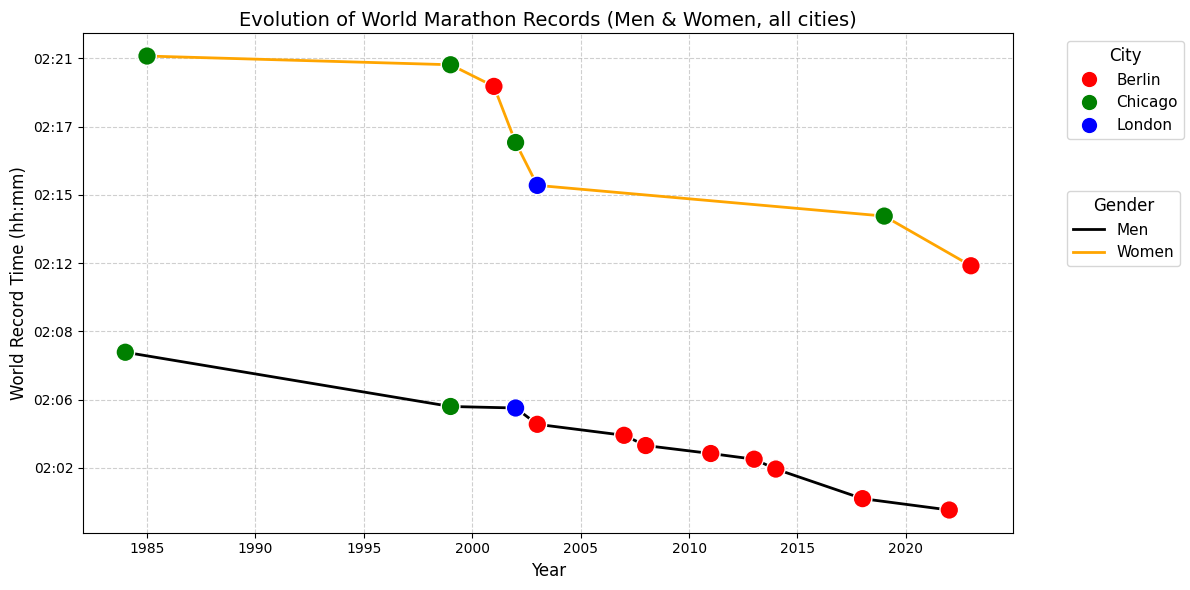

In [27]:
# ===============

# Base with world records

records = [
    # Men
    {"Year":1984,"Gender":"Men","City":"Chicago","Winner":"S. Jones","Time":"2:08:05"},
    {"Year":1999,"Gender":"Men","City":"Chicago","Winner":"K. Khannouchi","Time":"2:05:42"},
    {"Year":2002,"Gender":"Men","City":"London","Winner":"K. Khannouchi","Time":"2:05:38"},
    {"Year":2003,"Gender":"Men","City":"Berlin","Winner":"P. Tergat","Time":"2:04:55"},
    {"Year":2007,"Gender":"Men","City":"Berlin","Winner":"H. Gebrselassie","Time":"2:04:26"},
    {"Year":2008,"Gender":"Men","City":"Berlin","Winner":"H. Gebrselassie","Time":"2:03:59"},
    {"Year":2011,"Gender":"Men","City":"Berlin","Winner":"P. Makau","Time":"2:03:38"},
    {"Year":2013,"Gender":"Men","City":"Berlin","Winner":"W. Kipsang","Time":"2:03:23"},
    {"Year":2014,"Gender":"Men","City":"Berlin","Winner":"D. Kimetto","Time":"2:02:57"},
    {"Year":2018,"Gender":"Men","City":"Berlin","Winner":"E. Kipchoge","Time":"2:01:39"},
    {"Year":2022,"Gender":"Men","City":"Berlin","Winner":"E. Kipchoge","Time":"2:01:09"},
    # Women
    {"Year":1985,"Gender":"Women","City":"Chicago","Winner":"I. Kristiansen","Time":"2:21:06"},
    {"Year":1999,"Gender":"Women","City":"Chicago","Winner":"T. Loroupe","Time":"2:20:43"},
    {"Year":2001,"Gender":"Women","City":"Berlin","Winner":"N. Takahashi","Time":"2:19:46"},
    {"Year":2002,"Gender":"Women","City":"Chicago","Winner":"P. Radcliffe","Time":"2:17:18"},
    {"Year":2003,"Gender":"Women","City":"London","Winner":"P. Radcliffe","Time":"2:15:25"},
    {"Year":2019,"Gender":"Women","City":"Chicago","Winner":"B. Kosgei","Time":"2:14:04"},
    {"Year":2023,"Gender":"Women","City":"Berlin","Winner":"T. Assefa","Time":"2:11:53"},
]
df_wr = pd.DataFrame(records)

# Convert times to hours
def hms_to_hours(hms):
    h, m, s = map(int, hms.split(":"))
    return h + m/60 + s/3600

df_wr["Time"] = df_wr["Time"].apply(hms_to_hours)

# Color by city
city_colors = {"Berlin":"red","Chicago":"green","London":"blue"}

plt.figure(figsize=(12,6))

# Men
men = df_wr[df_wr["Gender"]=="Men"].sort_values("Year")
plt.plot(men["Year"], men["Time"], color="black", linestyle="-", lw=2)
plt.scatter(men["Year"], men["Time"],
            c=men["City"].map(city_colors),
            s=180, marker="o", edgecolor="white", zorder=5)

# Women
women = df_wr[df_wr["Gender"]=="Women"].sort_values("Year")
plt.plot(women["Year"], women["Time"], color="orange", linestyle="-", lw=2)
plt.scatter(women["Year"], women["Time"],
            c=women["City"].map(city_colors),
            s=180, marker="o", edgecolor="white", zorder=5)

# Format Y-axis as HH:MM
def hours_to_hhmm(x, pos):
    h = int(x)
    m = int((x - h) * 60)
    return f"{h:02d}:{m:02d}"

plt.gca().yaxis.set_major_formatter(FuncFormatter(hours_to_hhmm))

# Títles and labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("World Record Time (hh:mm)", fontsize=12)
plt.title("Evolution of World Marathon Records (Men & Women, all cities)", fontsize=14)

# City legend
city_handles = [
    Line2D([0],[0], marker="o", color="w", markerfacecolor=color, markersize=12, label=city)
    for city, color in city_colors.items()
]
legend1 = plt.legend(handles=city_handles, title="City", bbox_to_anchor=(1.05,1), loc="upper left",
                     fontsize=11, title_fontsize=12)

# Men/Women legend
gender_handles = [
    Line2D([0],[0], color="black", lw=2, label="Men"),
    Line2D([0],[0], color="orange", lw=2, label="Women"),
]
legend2 = plt.legend(handles=gender_handles, title="Gender", bbox_to_anchor=(1.05,0.7), loc="upper left",
                     fontsize=11, title_fontsize=12)

plt.gca().add_artist(legend1)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


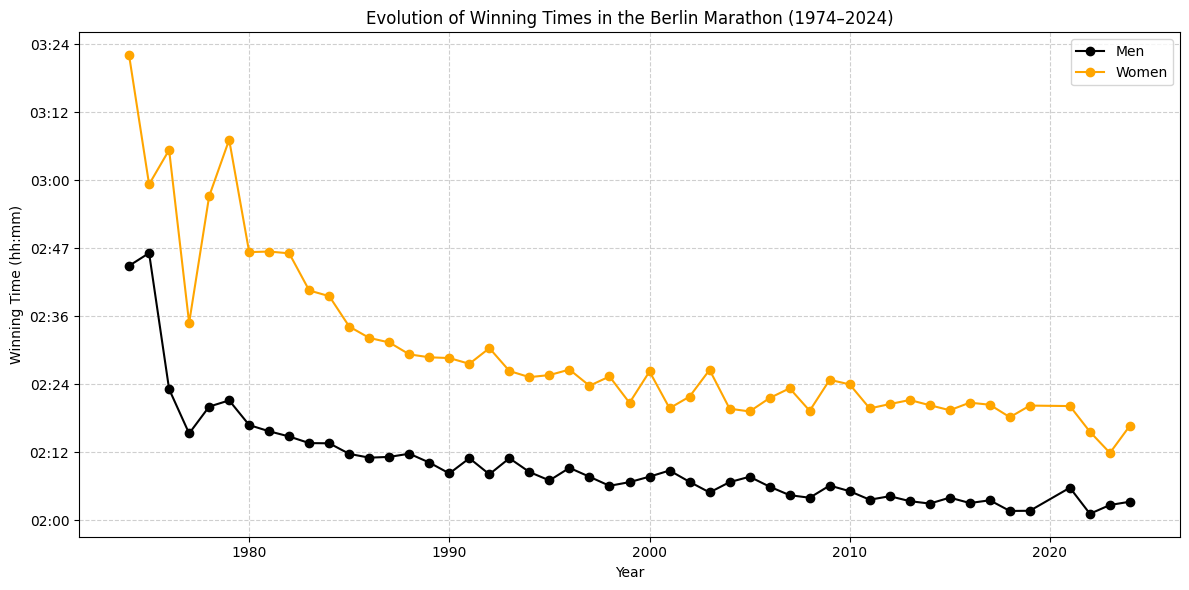

In [29]:
# ==========

# Load dataframe
df = pd.read_csv(config['input_data']['marathon_winners'])

# Convert times to timedelta
df["MEN_TIME"] = pd.to_timedelta(df["MEN_TIME"], errors="coerce")
df["WOMEN_TIME"] = pd.to_timedelta(df["WOMEN_TIME"], errors="coerce")

# Convert times to hours (decimal)
df["MEN_HOURS"] = df["MEN_TIME"].dt.total_seconds() / 3600
df["WOMEN_HOURS"] = df["WOMEN_TIME"].dt.total_seconds() / 3600

# Custom formatter for hh:mm on Y axis
def hours_to_hhmm(x, pos):
    h = int(x)
    m = int((x - h) * 60)
    return f"{h:02d}:{m:02d}"

# Make a Plot
plt.figure(figsize=(12,6))
plt.plot(df["YEAR"], df["MEN_HOURS"], label="Men", marker="o", color="black")
plt.plot(df["YEAR"], df["WOMEN_HOURS"], label="Women", marker="o", color="orange")

plt.xlabel("Year")
plt.ylabel("Winning Time (hh:mm)")  # Updated label
plt.title("Evolution of Winning Times in the Berlin Marathon (1974–2024)")
plt.legend()

# Apply formatter to Y axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(hours_to_hhmm))

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# How have winning times evolved in the Berlin Marathon from 1974 to 2024?

"""
Winning times in the Berlin Marathon have steadily improved from 1974 to 2024. 
Men’s winning times dropped from around 2h45 in the 1970s to just above 2h01 in recent years, 
making Berlin the fastest marathon course in the world. 
Women’s times decreased even more dramatically, from around 3h20 in 1974 to 2h11 in 2023 (a world record by Tigst Assefa). 
The data shows continuous progress until the mid-2010s, followed by stabilization in men’s performances, 
while women’s performances experienced a major breakthrough in the early 2020s.
"""

In [ ]:
# Are world records being broken more frequently in Berlin than in other marathons?

"""
Yes, world records are being broken more frequently in Berlin than in any other marathon. 
Berlin has become the premier “world record course” for men. 
Since 2003, almost every men’s marathon world record has been set in Berlin (Paul Tergat, Haile Gebrselassie, Patrick Makau, 
Wilson Kipsang, Dennis Kimetto, Eliud Kipchoge). On the women’s side, Tigst Assefa’s stunning 2:11:53 in 2023 also came in Berlin.

In contrast, other World Marathon Majors (Boston, New York, Tokyo) have produced no recent world records due to challenging courses, 
while London and Chicago have occasionally hosted records but far less consistently. 
This makes Berlin the most frequent site for world record performances in marathon history.
"""